In [259]:
# import modules & set up logging
import gensim, logging
from sortedcontainers import SortedDict
from gensim.models import KeyedVectors
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import unidecode
import numpy as np
%matplotlib inline

In [260]:
from aligning_embeddings import *
from w2vtransformation import *

In [261]:
import zipfile
import datetime
import urllib.request
import os.path
import matplotlib.pyplot as plt
from umap import UMAP # actually called "umap-learn"
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [330]:
model_vk = KeyedVectors.load_word2vec_format('../embeddings/vk_5year/vk_1955_1959', binary=True)

2019-02-12 16:44:17,527 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1955_1959
2019-02-12 16:44:19,130 : INFO : loaded (55838, 300) matrix from ../embeddings/vk_5year/vk_1955_1959


In [331]:
model_ah_nrc = KeyedVectors.load_word2vec_format('../embeddings/ah_nrc_5year/1955_1959', binary=True)

2019-02-12 16:44:19,140 : INFO : loading projection weights from ../embeddings/ah_nrc_5year/1955_1959
2019-02-12 16:44:20,842 : INFO : loaded (58896, 300) matrix from ../embeddings/ah_nrc_5year/1955_1959


In [324]:
def testModelConvergence(A, Ainv, B, Binv, vector_size):
    '''Given two models (A and B) and their inverse matrices, calculate the
    convergence between the two models (as a single value).'''
    TTinv = _calculateSymetricTransform(A, Ainv, B, Binv)
    Si_ip = np.trace(TTinv) / vector_size
    return Si_ip

In [325]:
model_ah_nrc_inv = getModelInv(model_ah_nrc)
model_vk_inv = getModelInv(model_vk)

In [327]:
d = testModelConvergence(model_vk, model_vk_inv, model_ah_nrc, model_ah_nrc_inv, model_vk.vector_size)

In [334]:
model_ah_nrc.most_similar('abortus')

2019-02-12 16:44:39,645 : INFO : precomputing L2-norms of word weight vectors


[('provocatus', 0.6767816543579102),
 ('zwangerschap', 0.5539559721946716),
 ('kindertal', 0.434703528881073),
 ('alcoholisme', 0.41981446743011475),
 ('sterilisatie', 0.4183107018470764),
 ('toediening', 0.415286660194397),
 ('bestrijding', 0.4112231731414795),
 ('alcohol', 0.401023268699646),
 ('verslaving', 0.39594805240631104),
 ('schizofrenie', 0.39499393105506897)]

In [269]:
model_ah_nrc = smart_procrustes_align_gensim(model_vk, model_ah_nrc)

In [280]:
keys = []
for k in model_vk.vocab:
    keys.append(k)

In [294]:
from random import randint
distances = []
random = []
for k in keys:
    random.append(cossim(model_ah_nrc[k], model_vk[keys[randint(0, len(keys) -1)]]))
    distances.append(cossim(model_ah_nrc[k], model_vk[k]))
    

In [321]:
from tqdm import tqdm
intersections = []
def intersection(lst1, lst2): 
    return len([value for value in lst1 if value in lst2])

for k in tqdm(keys):
    a = [k[0]for k in model_ah_nrc.most_similar(k, topn=20)]
    b = [k[0]for k in model_vk.most_similar(k, topn=20)]
    intersections.append(intersection(a, b))
    

100%|██████████| 42355/42355 [04:41<00:00, 150.22it/s]


In [323]:
np.mean(intersections)

3.9549049698972967

In [298]:
for k in keys:
    model_ah_nrc.most_similar(k)
    model_ah_nrc.most_similar(k)

KeyboardInterrupt: 

In [275]:
calc_distance_between_vectors(model_ah_nrc['prins'], model_vk['kip'])

1.396627

In [270]:
model_ah_nrc.most_similar('communisme')

[('imperialisme', 0.7231603264808655),
 ('nationalisme', 0.7185745239257812),
 ('democratie', 0.7015136480331421),
 ('kapitalisme', 0.6890313029289246),
 ('communistisch', 0.6805068254470825),
 ('ideologie', 0.6802319288253784),
 ('anti', 0.6601212024688721),
 ('stalinisme', 0.6512181162834167),
 ('atheistische', 0.6351566910743713),
 ('dictatuur', 0.6337939500808716)]

In [109]:
models = []
for year in range(1950,1995):
    models.append(KeyedVectors.load_word2vec_format('../embeddings/vk_5year/vk_{}_{}'.format(year, year+4), binary=True))

2019-02-12 12:13:36,327 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1950_1954
2019-02-12 12:13:37,666 : INFO : loaded (49521, 300) matrix from ../embeddings/vk_5year/vk_1950_1954
2019-02-12 12:13:37,667 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1951_1955
2019-02-12 12:13:39,028 : INFO : loaded (51893, 300) matrix from ../embeddings/vk_5year/vk_1951_1955
2019-02-12 12:13:39,035 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1952_1956
2019-02-12 12:13:41,493 : INFO : loaded (53856, 300) matrix from ../embeddings/vk_5year/vk_1952_1956
2019-02-12 12:13:41,493 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1953_1957
2019-02-12 12:13:43,081 : INFO : loaded (55120, 300) matrix from ../embeddings/vk_5year/vk_1953_1957
2019-02-12 12:13:43,082 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1954_1958
2019-02-12 12:13:44,558 : INFO : loaded (55435, 300) matrix from ../embeddings/vk_5year/vk_

2019-02-12 12:14:54,238 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1991_1995
2019-02-12 12:14:57,274 : INFO : loaded (77089, 300) matrix from ../embeddings/vk_5year/vk_1991_1995
2019-02-12 12:14:57,276 : INFO : loading projection weights from ../embeddings/vk_5year/vk_1992_1996


FileNotFoundError: [Errno 2] No such file or directory: '../embeddings/vk_5year/vk_1992_1996'

In [258]:
models[10].most_similar(['timmerman'], topn=20)

[('metselaar', 0.5686686038970947),
 ('elektricien', 0.5487218499183655),
 ('monteur', 0.5299981832504272),
 ('jarige_monteur', 0.49591124057769775),
 ('jarige', 0.49438178539276123),
 ('jarige_chauffeur', 0.49415040016174316),
 ('borgercompagnie', 0.4866933226585388),
 ('loodgieter', 0.47647377848625183),
 ('perser', 0.4760013818740845),
 ('wegens_diefstal', 0.47582319378852844),
 ('draaier', 0.4699278175830841),
 ('midlaren', 0.4604400396347046),
 ('betonvlechter', 0.4536038041114807),
 ('heier', 0.4489099383354187),
 ('jarige_koopman', 0.4474591016769409),
 ('andelst', 0.4454191327095032),
 ('meewisse', 0.4416935443878174),
 ('meijering', 0.4392923414707184),
 ('hilgeman', 0.43922287225723267),
 ('voorwerker', 0.43842166662216187)]

In [60]:
model = KeyedVectors.load_word2vec_format('../embeddings/1950_1954', binary=True)
#model2 = KeyedVectors.load('../embeddings/1951_1955_aligned')
#model3 = KeyedVectors.load('1952-1956_aligned')

2019-02-11 18:35:44,358 : INFO : loading projection weights from ../embeddings/1950_1954
2019-02-11 18:35:45,251 : INFO : loaded (41155, 300) matrix from ../embeddings/1950_1954


In [250]:
model.most_similar('amerika', topn=20)

2019-02-12 13:38:34,707 : INFO : precomputing L2-norms of word weight vectors


[('canada', 0.6276693940162659),
 ('staten_amerika', 0.59168940782547),
 ('ver_staten', 0.5444309711456299),
 ('staten', 0.531115710735321),
 ('washington', 0.5223700404167175),
 ('staten_mexico', 0.5125396847724915),
 ('pens', 0.5106716752052307),
 ('resource', 0.510177493095398),
 ('eneco', 0.5075746178627014),
 ('australie', 0.502663791179657),
 ('ridge', 0.49808627367019653),
 ('rosaria', 0.49758055806159973),
 ('atomie', 0.49728190898895264),
 ('geneveld', 0.4859711527824402),
 ('first_gas', 0.48162660002708435),
 ('chiu', 0.481273353099823),
 ('cloo', 0.4751600921154022),
 ('zuid_afrika', 0.47506606578826904),
 ('amerika_canada', 0.4733698070049286),
 ('zwitserland', 0.4727301597595215)]

In [106]:
model2.most_similar('communisme', topn=20)

[('ideologie', 0.711143434047699),
 ('kapitalisme', 0.6956566572189331),
 ('regiem', 0.6925550699234009),
 ('imperialisme', 0.6848801970481873),
 ('dictatuur', 0.6771408915519714),
 ('totalitaire', 0.6738979816436768),
 ('kapitalistische', 0.6669019460678101),
 ('communistische', 0.656761109828949),
 ('nationalisme', 0.6565431356430054),
 ('bolsjewisme', 0.6451188325881958),
 ('politiek', 0.6385974884033203),
 ('communistisch', 0.6328719258308411),
 ('democratie', 0.6323498487472534),
 ('marxistische', 0.6310870051383972),
 ('imperialistische', 0.627862274646759),
 ('socialisme', 0.6247803568840027),
 ('vrije_wereld', 0.6210146546363831),
 ('openlijke', 0.6202878952026367),
 ('marxisme', 0.6182631254196167),
 ('imperialisten', 0.6143878698348999)]

In [107]:
model3.most_similar('communisme', topn=20)

[('kapitalisme', 0.757884681224823),
 ('ideologie', 0.7317718863487244),
 ('regiem', 0.71070396900177),
 ('kapitalistische', 0.7106698155403137),
 ('imperialisme', 0.7057592868804932),
 ('imperialistische', 0.6970187425613403),
 ('kolonialisme', 0.6921709775924683),
 ('bolsjewisme', 0.6921616792678833),
 ('dictatuur', 0.6883389949798584),
 ('communistische', 0.6859374046325684),
 ('marxisme', 0.6847981810569763),
 ('ideologische', 0.667766809463501),
 ('wereldrevolutie', 0.6633001565933228),
 ('stalinisme', 0.6621647477149963),
 ('marxistische', 0.6619113683700562),
 ('ideologisch', 0.6582938432693481),
 ('vrije_wereld', 0.6578073501586914),
 ('communistisch', 0.6561650037765503),
 ('nationalisme', 0.6557142734527588),
 ('totalitaire', 0.6494765281677246)]

In [114]:
def calc_distance_between_vectors(vec1, vec2, distype = 'norm'):
    if distype is 'norm':
        return np.linalg.norm(np.subtract(vec1, vec2))
    else:
        return cossim(vec1, vec2)

In [150]:
np.sum(models[1][christianity], axis=0)

array([-2.66355896e+00, -8.39680433e-02,  2.03327551e-01, -1.31510794e+00,
        1.47950336e-01, -2.93613672e-01, -5.07689893e-01, -8.82676840e-01,
       -9.24539328e-01,  1.72720551e-02, -1.21162510e+00, -1.18613005e+00,
        3.31308752e-01,  2.08614111e-01,  5.60837090e-01, -2.16615963e+00,
        2.79017955e-01,  1.13642156e+00, -1.29823256e+00, -4.79328260e-02,
        2.54549861e-01,  1.12992227e+00,  2.00315642e+00,  8.96511734e-01,
        8.79737854e-01,  3.42426509e-01, -1.27797961e+00, -2.53005356e-01,
        1.21664310e+00,  1.86866188e+00,  3.77589405e-01,  2.51243711e+00,
       -2.13163900e+00, -5.62847614e-01, -1.11196578e+00, -1.70423269e+00,
        2.91526616e-01, -1.81841743e+00, -2.44439021e-02,  8.11976492e-01,
        3.03651214e+00, -2.07246482e-01,  1.50273368e-01, -1.27547994e-01,
       -6.67876959e-01, -1.11285388e+00, -1.05969203e+00, -6.75532699e-01,
       -2.72792071e-01,  2.43493512e-01,  7.39123106e-01, -2.77301455e+00,
        2.48584017e-01,  

In [173]:
distances = []
years = range(1950, 1991)
key = 'vrouw'
for i in range(0, len(models) - 1):
    distances.append(calc_distance_between_vectors(models[i][key], models[i + 1][key]))

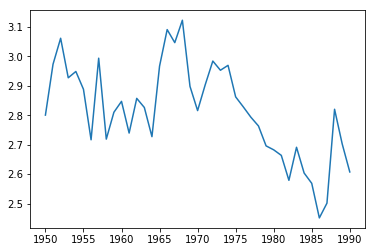

In [174]:
plt.plot(years, distances)

In [142]:
christianity = ['doop',
                'messias', 
                'katholicisme', 
                'christendom', 
                'verlossing',
                'protestant', 
                'jezus', 
                'christus', 
                'kerk']

In [126]:
def cossim(v1, v2, signed = True):
    c = np.dot(v1, v2)/np.linalg.norm(v1)/np.linalg.norm(v2)
    if not signed:
        return abs(c)
    return c

In [112]:
cossim(model['communisme'], model2['communisme'])

0.87318164

In [114]:
print(model[christianity].var())
print(model2[christianity].var())
print(model3[christianity].var())

0.0033330359
0.0033317986
0.003333173


In [62]:
model.most_similar("communisme", topn=5)

[('kapitalisme', 0.7413933277130127),
 ('imperialisme', 0.7057558298110962),
 ('kapitalistische', 0.6974900960922241),
 ('regiem', 0.6896220445632935),
 ('ideologie', 0.6830700039863586)]

In [62]:
yTerms = SortedDict()
yLinks = SortedDict()

In [62]:
sortedKeys = model2.vocab.keys()

In [65]:
model['communisme']

array([-0.05953864, -0.06608585,  0.05655144, -0.15380959, -0.00718343,
       -0.0160841 , -0.13614807,  0.0198624 ,  0.09744193,  0.06287014,
       -0.07119982, -0.12562901, -0.09788055, -0.10099917,  0.16604246,
       -0.02073995, -0.11430966, -0.02256863, -0.13228981,  0.10485657,
       -0.11151238,  0.11461014,  0.02720036,  0.20482713,  0.01529762,
        0.03935155, -0.03174562, -0.10255636, -0.00241621,  0.25700456,
       -0.17520136,  0.02103506,  0.02599602,  0.01553081, -0.1298051 ,
       -0.26184455, -0.01808393,  0.03011501, -0.06735516,  0.01300642,
       -0.1434552 , -0.13888551,  0.1333619 ,  0.06436138,  0.1903968 ,
        0.00708404, -0.09336974,  0.23342137,  0.0035793 , -0.01637718,
        0.13774383, -0.05461056,  0.05938341, -0.09673276,  0.11449451,
        0.28269362,  0.11001812,  0.05774627, -0.05242467,  0.1628339 ,
       -0.10634366, -0.08469763,  0.02990113,  0.20497942, -0.03560136,
       -0.14783438, -0.04981564, -0.07026649, -0.07450823,  0.03

In [61]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [62]:
keys = ['politiek', 'crimineel', 'communisme']

In [63]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=100):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

2019-02-11 18:35:45,285 : INFO : precomputing L2-norms of word weight vectors


In [64]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()




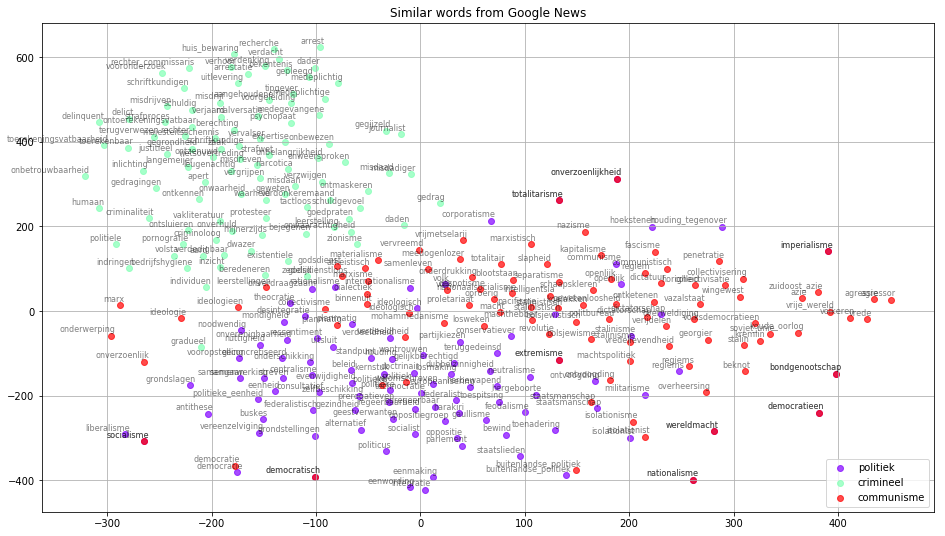

In [66]:
tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [3]:
def sampleVectors(vectors, size_frac):
    size = len(vectors)
    log(f'Sampling {size_frac * 100}% of {size} vectors')
    sample = int(size * size_frac)
    numFeat = len(vectors[0])
    sampVecs = np.ndarray((sample, numFeat), np.float32)
    indices = np.random.choice(len(vectors), sample)
    for i, val in enumerate(indices):
        sampVecs[i] = vectors[val]
    return sampVecs, indices

In [11]:
def reduceWithPCA(vectors, size):
    log(f'Reducing data to {size} features using PCA (fast)')
    pca = PCA(n_components=size)
    vecs = pca.fit_transform(vectors)

    return vecs

def reduceWithUMAP(vectors, size):
    log(f'Reducing data to {size} features using UMAP (slow-ish)')
    umap = UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=size)
    vecs = umap.fit_transform(vectors)

    return vecs

def reduceWithTSNE(vectors, size):
    log(f'Reducing data to {size} features using T-SNE (slow)')
    tsne = TSNE(n_components=size)
    vecs = tsne.fit_transform(vectors)

    return vecs

def PCA_then_UMAP(vectors, pca_size, umap_size):
    pcaVecs = reduceWithPCA(vectors, pca_size)
    umapVecs = reduceWithUMAP(pcaVecs, umap_size)

    return umapVecs


def PCA_then_TSNE(vectors, pca_size, tsne_size):
    pcaVecs = reduceWithPCA(vectors, pca_size)
    tsneVecs = reduceWithTSNE(pcaVecs, tsne_size)

    return tsneVecs

def clusterForColour(vectors, size):
    log(f'Using KMeans to generate {size} groups so the final graph is prettier...')
    clusters = KMeans(n_clusters=size).fit_predict(vectors)

    return clusters

# save in a format our graphit.html file is expecting (basically a json object)
def saveAsGraphitFile(model, vectors, indices, clusters, fname):
    log(f'Writing data to {fname}...')
    f = open(fname, "w", encoding='utf-8')
    f.write('var W2VDATA=[\n')
    for i, val in enumerate(indices):
        kw = model.index2word[val]
        if len(kw) > 1:
            v = vectors[i]
            f.write('["')
            f.write(kw.replace('"', '\\"'))  # keyword
            f.write('",')
            f.write(str(v[0]))  # x
            f.write(',')
            f.write(str(v[1]))  # y
            f.write(',')
            f.write(str(v[2]))  # z
            f.write(',')
            f.write(str(clusters[i]))  # colour group (just an integer)
            f.write('],\n')
    f.write('];\n')
    f.close()

    return fname

def plot2D(vectors):
    x = np.flipud(np.rot90(vectors[:], k=1, axes=(0, 1)))
    plt.scatter(x[0], x[1], c=clusters, marker=".")
    plt.show()
    plt.pause(5)
    
def log(msg):
    print(datetime.datetime.time(datetime.datetime.now()), msg)

In [175]:
model = models[15]

In [234]:
noun_model = np.ndarray((len(nouns[0]), 300), np.float32)

In [240]:
keys = [str(noun) for noun in nouns[0]]

In [241]:
for i, noun in enumerate(keys):
    noun_model[i] = model[noun]

In [246]:
vectors = noun_model.vectors

AttributeError: 'numpy.ndarray' object has no attribute 'vectors'

In [247]:
vectors = PCA_then_UMAP(vectors, 50, 3)


13:01:34.720631 Reducing data to 50 features using PCA (fast)
13:01:35.661367 Reducing data to 3 features using UMAP (slow-ish)


In [248]:
clusters = clusterForColour(vectors, 10)

13:03:05.507725 Using KMeans to generate 10 groups so the final graph is prettier...


In [249]:
fname = saveAsGraphitFile(model, vectors, indices, clusters, './html/keyword-data.js')

log(f'Finished, now open html/graphit.html')

13:03:07.987667 Writing data to ./html/keyword-data.js...
13:03:08.405507 Finished, now open html/graphit.html


In [183]:
model.vocab

{'wel': <gensim.models.keyedvectors.Vocab at 0x198d1eac8>,
 'jaar': <gensim.models.keyedvectors.Vocab at 0x198d1ea58>,
 'twee': <gensim.models.keyedvectors.Vocab at 0x198d1eb38>,
 'amsterdam': <gensim.models.keyedvectors.Vocab at 0x198d1eb70>,
 'weer': <gensim.models.keyedvectors.Vocab at 0x198d1ebe0>,
 'uur': <gensim.models.keyedvectors.Vocab at 0x198d1ec50>,
 'nederland': <gensim.models.keyedvectors.Vocab at 0x198d1ec88>,
 'grote': <gensim.models.keyedvectors.Vocab at 0x198d1ecf8>,
 'moeten': <gensim.models.keyedvectors.Vocab at 0x198d1ed68>,
 'eerste': <gensim.models.keyedvectors.Vocab at 0x198d1edd8>,
 'nederlandse': <gensim.models.keyedvectors.Vocab at 0x198d1ee10>,
 'alle': <gensim.models.keyedvectors.Vocab at 0x198d1ee80>,
 'waar': <gensim.models.keyedvectors.Vocab at 0x198d1eef0>,
 'alleen': <gensim.models.keyedvectors.Vocab at 0x198d1ef60>,
 'zullen': <gensim.models.keyedvectors.Vocab at 0x198d1efd0>,
 'heer': <gensim.models.keyedvectors.Vocab at 0x198d1f080>,
 'komen': <gensi

In [192]:
keys = []
for k in model.vocab:
    keys.append(k)

In [193]:
keys

['wel',
 'jaar',
 'twee',
 'amsterdam',
 'weer',
 'uur',
 'nederland',
 'grote',
 'moeten',
 'eerste',
 'nederlandse',
 'alle',
 'waar',
 'alleen',
 'zullen',
 'heer',
 'komen',
 'drie',
 'man',
 'gaan',
 'gulden',
 'onze_correspondent',
 'zei',
 'gaat',
 'wij',
 'tussen',
 'goed',
 'percent',
 'mensen',
 'maken',
 'den_haag',
 'volgens',
 'tijd',
 'kwam',
 'staat',
 'echter',
 'werden',
 'toe',
 'onze',
 'werk',
 'laatste',
 'jan',
 'zeer',
 'rotterdam',
 'nieuws',
 'eigen',
 'mei',
 'steeds',
 'vooral',
 'zoals',
 'weg',
 'vier',
 'aantal',
 'land',
 'waarin',
 'regering',
 'hadden',
 'laten',
 'zien',
 'politie',
 'mee',
 'willen',
 'zelfs',
 'jarige',
 'plaats',
 'per',
 'leven',
 'tweede',
 'juli',
 'utrecht',
 'vrouw',
 'zouden',
 'ver',
 'dag',
 'maart',
 'vijf',
 'heel',
 'moest',
 'oude',
 'staan',
 'ging',
 'auto',
 'minder',
 'geven',
 'tijdens',
 'krijgen',
 'weinig',
 'miljoen_gulden',
 'deel',
 'zeggen',
 'groot',
 'week',
 'meter',
 'achter',
 'bijna',
 'programma',
 'bi

In [186]:
nlp = spacy.load('nl_core_news_sm', disable=['parser', 'ner'])

In [198]:
allowed_postags=['NOUN', 'PROPN']
nouns = []
for key in keys[:100]:
    
    key_ = nlp(" " key)
    nouns.append([k for k in key_ if key.pos_ in allowed_postags ])

AttributeError: 'str' object has no attribute 'pos_'

In [206]:
keys_ = nlp(' '.join(key for key in keys))

In [228]:
nouns = []
nouns.append([token for token in keys_ if token.pos_ in allowed_postags])

In [230]:
len(nouns[0])

28827